<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
titanic_csv = '../DATA/titanic_train.csv'

titanic = pd.read_csv(titanic_csv, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our logreg_model. We use it to partition the dataset and to test the predictions of our logreg_model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [93]:
# ANSWER
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [94]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

def bar_chart(train, feature):
    survived = train[train['Survived']==1][feature].value_counts(normalize=True)*100
    dead = train[train['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


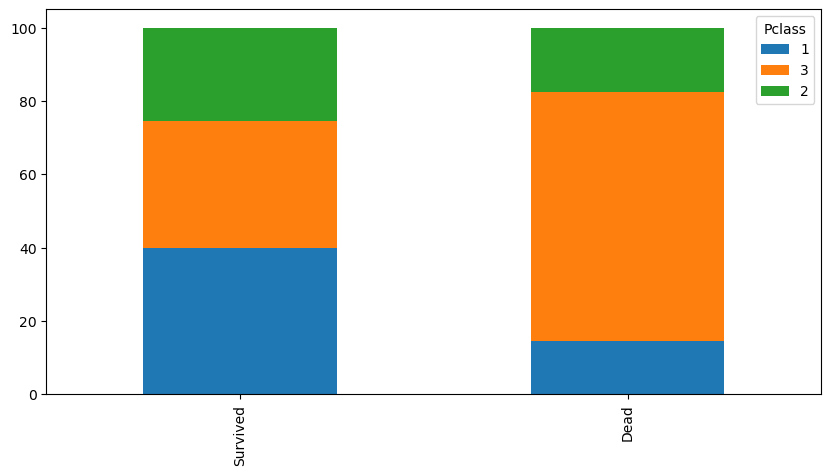

In [11]:
bar_chart(titanic, 'Pclass')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a logreg_model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [158]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic['Survived']

#### 3.2 Split

Split the data into training and testing subsets:

- Use `random_state` = 1

In [159]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.columns

Index(['Pclass', 'Parch'], dtype='object')

#### 3.3. Build logreg_model

Prepare a logreg_model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_logreg_model` library:

In [160]:
# ANSWER
# Create logreg_model
logreg_model = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [161]:
# ANSWER
# Fit logreg_model
logreg_model.fit(X_train, y_train)


LogisticRegression()

##### Confusion matrix no age

In [1]:
y_pred_no_age = logreg_model.predict(X_train)
conf_no_age = metrics.confusion_matrix(y_train, y_pred_no_age)
print(conf_no_age)
X_test.columns

NameError: name 'logreg_model' is not defined

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [133]:
# ANSWER
logreg_model.coef_

array([[-0.87255641,  0.33795155]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [134]:
# ANSWER
logreg_model.intercept_

array([1.30477093])

We can create tuples of the predictor names and coefficients like this:

In [135]:
# ANSWER
print(set(zip(feature_cols, logreg_model.coef_[0])))

{('Pclass', -0.8725564114352723), ('Parch', 0.33795154959809853)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [136]:
for col in zip(X_train.columns, logreg_model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872556
Parch       +0.337952


In [137]:
for col_name, coef in zip(X_train.columns, logreg_model.coef_[0]):
    print(f'{col_name:<10s}  {coef:+.06f}')

Pclass      -0.872556
Parch       +0.337952


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The accuracy `score` is the proportion of correct predictions:

In [163]:
# ANSWER
score = logreg_model.score(X_train, y_train)
print(X_train.columns)
print(f'accuracy = {score:7.4f}')

Index(['Pclass', 'Parch'], dtype='object')
accuracy =  0.6901


What is the accuracy `score` for the test data?

In [164]:
# ANSWER
test_score = logreg_model.score(X_test, y_test)
print(f'accuracy = {test_score:7.4f}')

accuracy =  0.6682


What can we say about this result?

ANSWER
- Because the scores are relatively close, we can conclude that the model was not overfitted to the training data (if it were, the score on the test data would be lower)
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [165]:
# ANSWER
mean_age = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(mean_age)

In [153]:
titanic[titanic.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [166]:
# Build model

feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]

# print('X_train before:')
# print(X_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# print('X_train after:')
# print(X_train)

logreg_model = LogisticRegression()

# Fit model
logreg_model.fit(X_train, y_train)

# Score
new_score = logreg_model.score(X_train, y_train)
new_test_score = logreg_model.score(X_test, y_test)

print(X_train.columns)

print("Before:")
print(f'training accuracy = {score:7.4f}')
print(f'testing accuracy = {test_score:7.4f}')

print("After:")
print(f'training accuracy = {new_score:7.4f}')
print(f'testing accuracy = {new_test_score:7.4f}')


Index(['Pclass', 'Parch', 'Age'], dtype='object')
Before:
training accuracy =  0.6901
testing accuracy =  0.6682
After:
training accuracy =  0.7171
testing accuracy =  0.6726


So, including age did little to reduce the variance in our logreg_model. Why might this be?

ANSWER
- Age may have been a lower proirity than other factors (sex, children, passenger class) when deciding who should get into the lifeboats.
- Also we imputed a fair number of missing ages; this may have diluted the power of the age variable

Let's see where the logreg_model is going wrong by showing the Confusion Matrix:

In [167]:
# ANSWER
y_pred_with_age = logreg_model.predict(X_test)
conf_with_age = metrics.confusion_matrix(y_test, y_pred_with_age)
print(conf_with_age)
X_test.columns

[[107  21]
 [ 52  43]]


Index(['Pclass', 'Parch', 'Age'], dtype='object')

In [168]:
print("confusion matrix, without Age:")
print(conf_no_age)
print()
print("Confusion matrix with Age:")
print(conf_with_age)

confusion matrix, without Age:
[[105  23]
 [ 51  44]]

Confusion matrix with Age:
[[107  21]
 [ 52  43]]


Nb. Here is how `confusion_matrix` arranges its output:

In [ ]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [187]:
# From Sasanka
print(np.asarray([['TP', 'FP'], ['FN', 'TN']]))

[['TP' 'FP']
 ['FN' 'TN']]


Which type of error is more prevalent?

ANSWER: False Negatives.

The errrors are the False predictions: False Positives (FP) and False Negatives (FN).  Since FP = 21 and FN = 52, there were more False Negatives than False Positives.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

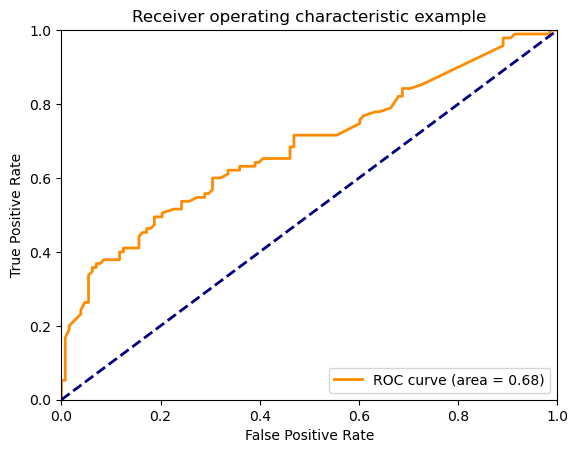

In [177]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg_model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the logreg_model:

In [5]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [6]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the logreg_model using the expanded set of predictors and compute the accuracy score for the test set:

In [172]:
# ANSWER
# Set Feature Both Numerical, Categorical

target_col = 'Survived'
feature_cols = ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
get_logreg_score(titanic_with_dummies, feature_cols, target_col)

NameError: name 'get_logreg_score' is not defined

Plot the ROC curve for the new logreg_model:

In [178]:
print(logreg_model)

LogisticRegression()


In [183]:
# ANSWER
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg_model.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

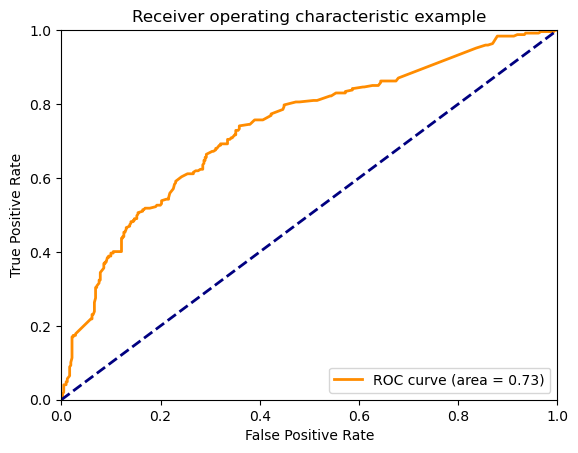

In [185]:
plot_roc_curve(X_train, y_train)

Can we improve the logreg_model by including the remaining features?

In [188]:
# ANSWER
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
# get_logreg_score(titanic_with_dummies, feature_cols, target_col)
ttwd = titanic_with_dummies
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
                                            100 * ttwd[ttwd.Sex_male == 1].Survived.mean(), ttwd.Sex_male.sum(),
                                            100 * ttwd[ttwd.Sex_female == 1].Survived.mean(), ttwd.Sex_female.sum(),
                                            100 * ttwd[ttwd.Age < 16].Survived.mean(), len(ttwd[ttwd.Age < 16])))

Male survival: 18.89% of 577
Female survival: 74.20% of 314
Child survival: 59.04% of 83


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final logreg_modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the logreg_model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best logreg_model.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



